# <small>
### Company Bankruptcy Prediction Model
# 
##### This notebook outlines a machine learning pipeline to predict corporate bankruptcy using a U.S. dataset.
# 
### **Table of Contents**
### 1. Project Overview
####    - Business Questions
####    - Literature Review
### 2. Data Description
### 3. Exploratory Data Analysis (EDA)
####    - Summary Statistics
####   - Data Cleaning and Handling Missing Data
####   - Outlier Detection (if applicable)
####    - Visualization & Feature Correlation
### 4. Feature Engineering and Selection
####    - Feature Transformation
####    - Feature Engineering
####    - Feature Selection
### 5. Model Development
####    - Baseline Model (Logistic Regression)
####    - Hyper-parameter Tuning
####   - Model Evaluation
### 6. Final Model Explanation
####    - Feature Importance
#    


## 1. Project Overview
# 
### **Business Questions:**
#### - Which financial indicators are most predictive of bankruptcy?
#### - What business insights can be derived from high-risk versus low-risk firms?
#### - What level of accuracy can we achieve in predicting bankruptcy?
# 
### **Literature Review:**
##### - *[Include here a summary of relevant academic papers and industry reports regarding bankruptcy prediction and survival analysis.]*


## 2. Data Description
# 
##### The dataset `american_bankruptcy.csv` contains information on American companies. It includes various financial indicators used to predict the likelihood of bankruptcy.  
# 

In [12]:
## Import necessary libraries for data handling, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## For survival analysis 
from lifelines import CoxPHFitter

## Set a simple plotting style
plt.style.use('default')


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For displaying all columns in the notebook output
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# Define the file path (using a raw string to avoid backslash issues)
file_path = r"C:\Users\Sima\Company-Bankruptcy-Prediction\american_bankruptcy.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print("Data Shape:", df.shape)
df.head()


Data Shape: (78682, 21)


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.2670,833.1070,18.3730,89.0310,336.0180,35.1630,128.3480,372.7519,"1,024.3330",740.9980,180.4470,70.6580,191.2260,163.8160,201.0260,"1,024.3330",401.4830,935.3020
1,C_1,alive,2000,485.8560,713.8110,18.5770,64.3670,320.5900,18.5310,115.1870,377.1180,874.2550,701.8540,179.9870,45.7900,160.4440,125.3920,204.0650,874.2550,361.6420,809.8880
2,C_1,alive,2001,436.6560,526.4770,22.4960,27.2070,286.5880,-58.9390,77.5280,364.5928,638.7210,710.1990,217.6990,4.7110,112.2440,150.4640,139.6030,638.7210,399.9640,611.5140
3,C_1,alive,2002,396.4120,496.7470,27.1720,30.7450,259.9540,-12.4100,66.3220,143.3295,606.3370,686.6210,164.6580,3.5730,109.5900,203.5750,124.1060,606.3370,391.6330,575.5920
4,C_1,alive,2003,432.2040,523.3020,26.6800,47.4910,247.2450,3.5040,104.6610,308.9071,651.9580,709.2920,248.6660,20.8110,128.6560,131.2610,131.8840,651.9580,407.6080,604.4670


In [16]:
# Check the column names and data types
print("Column Names:", df.columns.tolist())
print("\nData Types:")
display(df.dtypes)


Column Names: ['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

Data Types:


company_name     object
status_label     object
year              int64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object

### 3. Exploratory Data Analysis (EDA)
# 
#### In this section, we:
#### - Display summary statistics.
#### - Check for missing values.
#### - Visualize distributions of numeric features.
#### - Plot a correlation matrix to examine relationships between features.


In [18]:
# Display summary statistics for numerical features
print("Summary Statistics:")
print(df.describe())

# Check for missing values across the dataset
print("\nMissing values per column:")
print(df.isnull().sum())


Summary Statistics:
             year           X1           X2          X3           X4  \
count 78,682.0000  78,682.0000  78,682.0000 78,682.0000  78,682.0000   
mean   2,007.5063     880.3625   1,594.5290    121.2343     376.7594   
std        5.7428   3,928.5648   8,930.4847    652.3768   2,012.0231   
min    1,999.0000      -7.7600    -366.6450      0.0000 -21,913.0000   
25%    2,002.0000      18.9240      17.0383      1.1920      -0.8110   
50%    2,007.0000     100.4495     103.6610      7.9295      15.0345   
75%    2,012.0000     431.5267     634.5480     47.9718     139.6552   
max    2,018.0000 169,662.0000 374,623.0000 28,430.0000  81,730.0000   

               X5           X6          X7             X8           X9  \
count 78,682.0000  78,682.0000 78,682.0000    78,682.0000  78,682.0000   
mean     201.6057     129.3825    286.8327     3,414.3546   2,364.0197   
std    1,060.7661   1,265.5320  1,335.9786    18,414.1036  11,950.0688   
min        0.0000 -98,696.0000     

In [9]:
# Display summary statistics for numerical columns
print("Statistical Summary (Numerical):")
display(df.describe())


Statistical Summary (Numerical):


,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,"78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000"
mean,"2,007.5063",880.3625,"1,594.5290",121.2343,376.7594,201.6057,129.3825,286.8327,"3,414.3546","2,364.0197","2,867.1106",722.4837,255.5250,769.4908,610.0723,532.4671,"2,364.0197","1,773.5640","1,987.2603"
std,5.7428,"3,928.5648","8,930.4847",652.3768,"2,012.0231","1,060.7661","1,265.5320","1,335.9786","18,414.1036","11,950.0688","12,917.9444","3,242.1709","1,494.6435","3,774.7031","2,938.3874","6,369.1594","11,950.0688","8,053.6849","10,419.6290"
min,"1,999.0000",-7.7600,-366.6450,0.0000,"-21,913.0000",0.0000,"-98,696.0000",-0.0060,0.0001,"-1,964.9990",0.0010,-0.0230,"-25,913.0000","-21,536.0000",0.0010,"-102,362.0000","-1,964.9990",0.0010,-317.1970
25%,"2,002.0000",18.9240,17.0383,1.1920,-0.8110,0.0000,-7.4158,3.2812,34.9800,27.5485,37.3635,0.0000,-2.7870,8.5213,8.8893,-68.2827,27.5485,13.4860,32.8725
50%,"2,007.0000",100.4495,103.6610,7.9295,15.0345,7.0230,1.6160,22.8200,227.5118,186.5985,213.2035,7.5935,6.5180,63.5815,43.3330,-1.1310,186.5985,81.9880,168.9120
75%,"2,012.0000",431.5267,634.5480,47.9718,139.6552,74.7473,40.1442,131.5805,"1,244.8899","1,046.4025","1,171.3648",248.7608,87.5990,344.0743,222.8170,146.0700,"1,046.4025",629.9750,875.5222
max,"2,018.0000","169,662.0000","374,623.0000","28,430.0000","81,730.0000","62,567.0000","104,821.0000","65,812.0000","1,073,390.5400","511,729.0000","531,864.0000","166,250.0000","71,230.0000","137,106.0000","116,866.0000","402,089.0000","511,729.0000","337,980.0000","481,580.0000"


### Visualizations: Distribution and Correlation
# 
##### We'll create histograms for each numeric feature to examine their distributions and plot a correlation matrix.


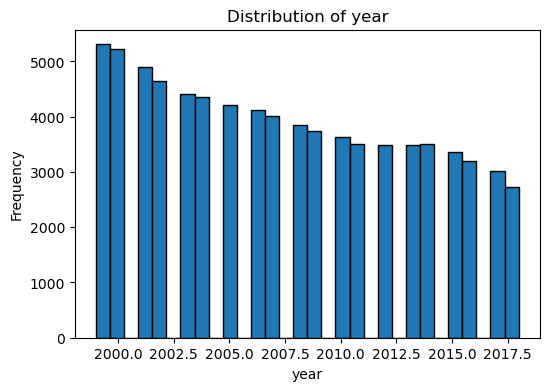

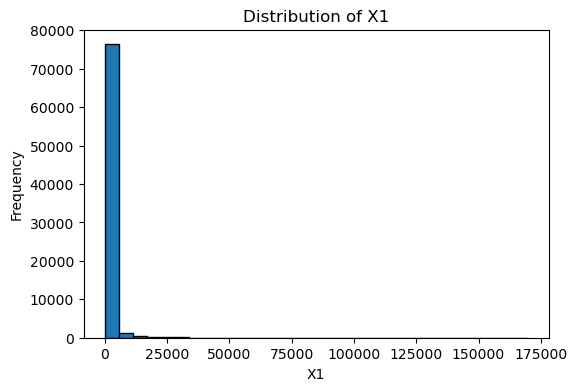

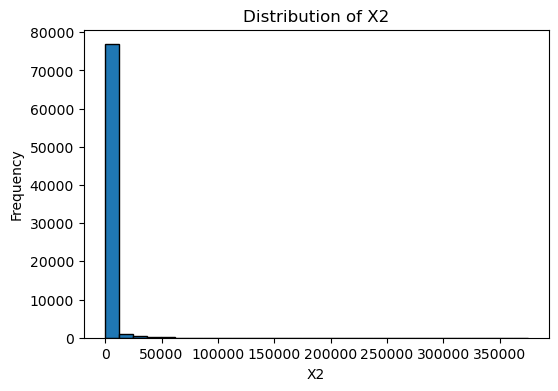

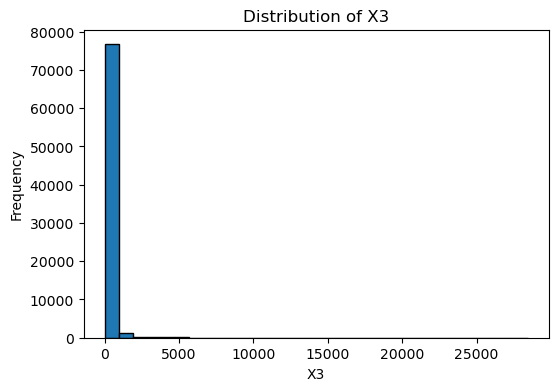

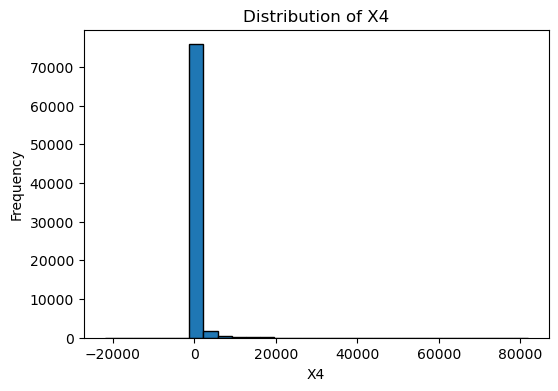

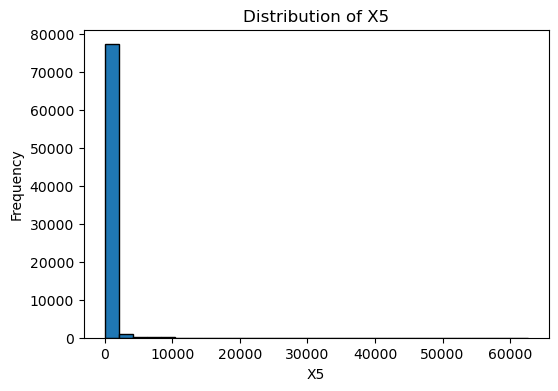

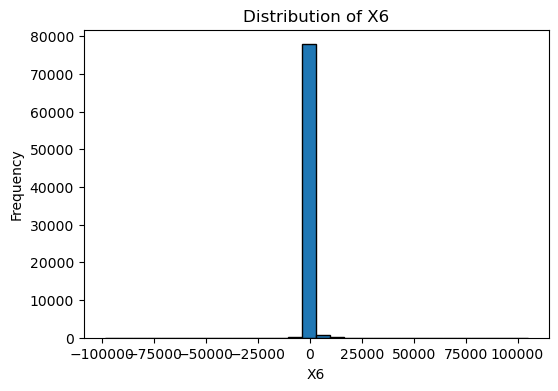

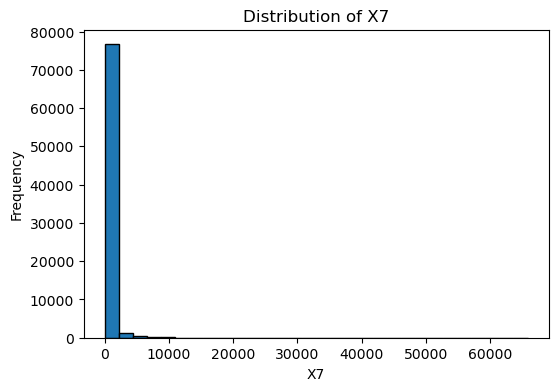

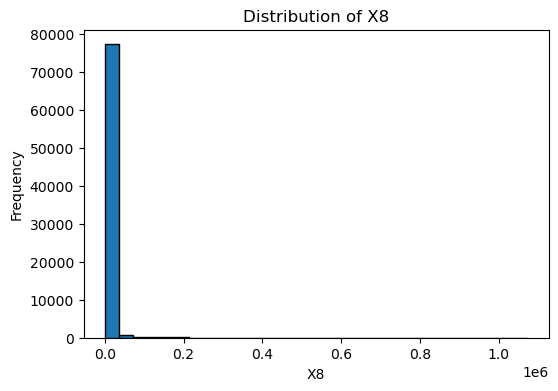

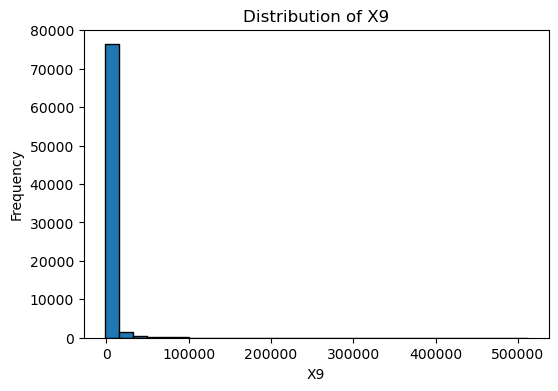

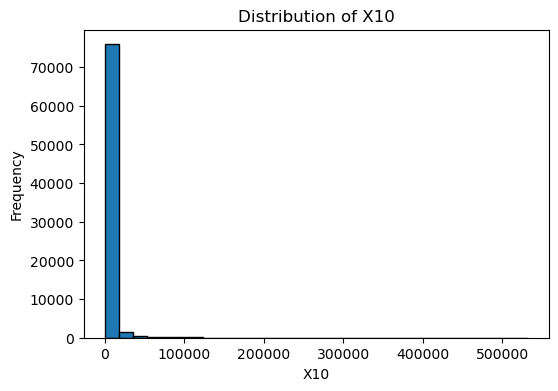

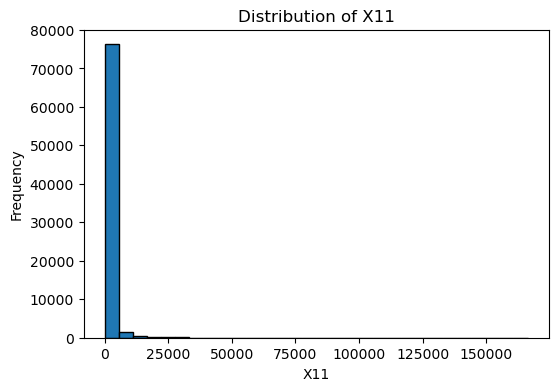

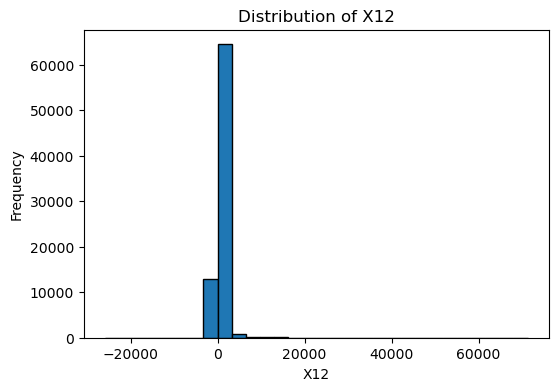

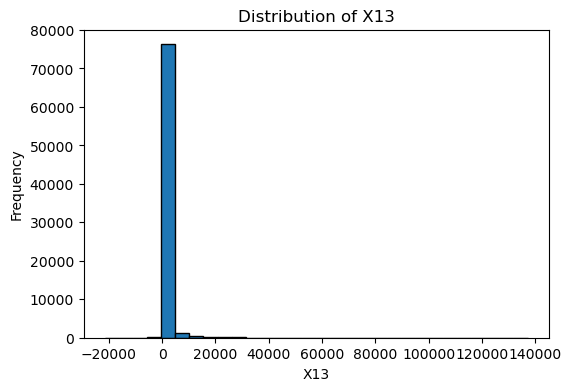

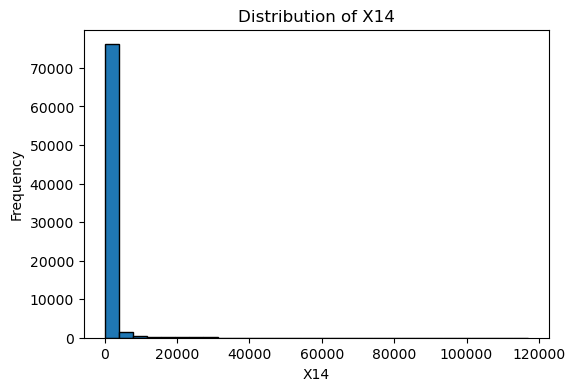

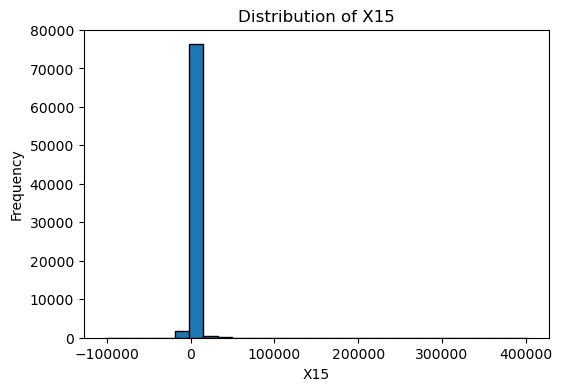

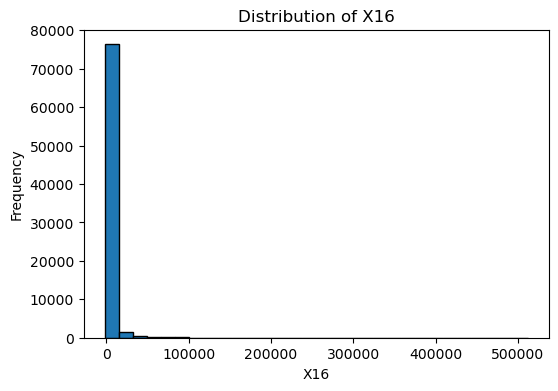

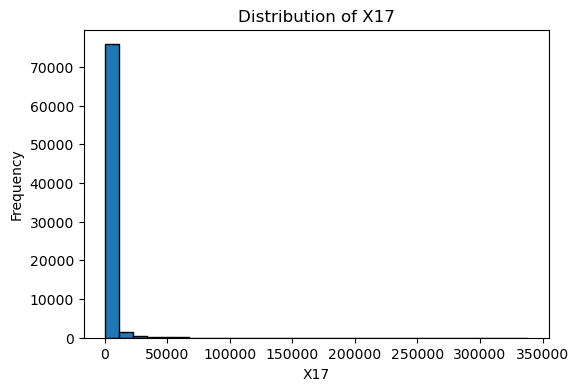

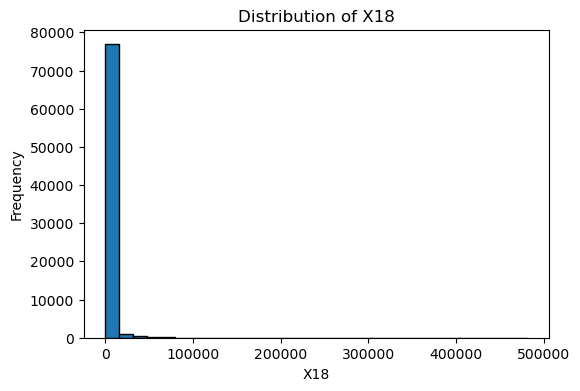

In [21]:
# Plot histograms for each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


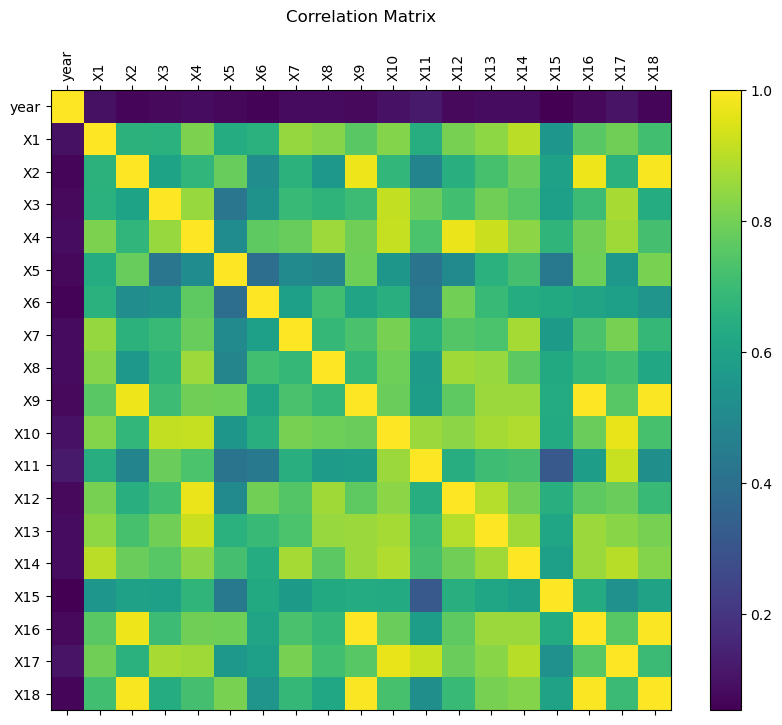

In [23]:
# Plot a correlation matrix for all numeric features
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()


## 4. Feature Engineering and Selection
# 
#### In this section, we will:
#### - Clean the data (handle missing values).
#### - Apply transformations to skewed features (if needed).
#### - Prepare the data by selecting relevant features.


In [25]:
# Data Cleaning: Fill missing numeric values with the mean value for that column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Example of feature transformation: Log-transform a skewed feature if it exists.
if 'Total_Assets' in df.columns:
    df['Total_Assets_log'] = np.log1p(df['Total_Assets'])
    print("Applied log transformation on 'Total_Assets'.")


### Prepare Data for Modeling
# 
#### We now define our target variable and feature set. (status_label)


In [27]:
# %% [code]
# Define target and features
target = 'status_label'  # Change this if your target column has a different name

# Select numeric features for modeling, excluding the target
features = [col for col in df.columns if col != target and df[col].dtype != 'object']
print("Features used for modeling:", features)

# Create feature (X) and target (y) datasets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Features used for modeling: ['year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
Training set shape: (62945, 19)
Test set shape: (15737, 19)


### Standardize the Features
# 
#### Standardization ensures that all features contribute equally to the model performance.


In [28]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


## 5. Model Development
# 
#### We build a baseline model using Logistic Regression to predict bankruptcy.  
#### The model will be evaluated using confusion matrix, classification report, and ROC AUC score.


In [29]:
# Train a baseline Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate model performance using a confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[14663     6]
 [ 1062     6]]

Classification Report:
              precision    recall  f1-score   support

       alive       0.93      1.00      0.96     14669
      failed       0.50      0.01      0.01      1068

    accuracy                           0.93     15737
   macro avg       0.72      0.50      0.49     15737
weighted avg       0.90      0.93      0.90     15737



ROC AUC Score: 0.6468384243262628


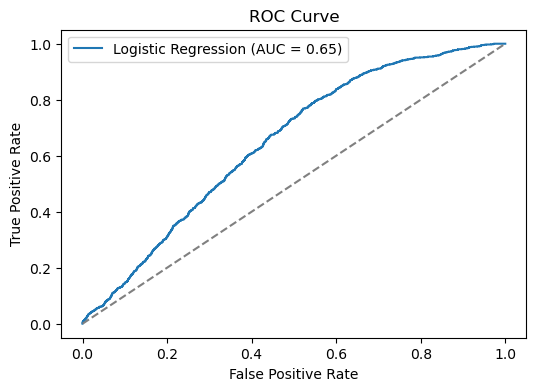

In [31]:
# Compute predicted probabilities and ROC AUC score
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", auc)

# Plot the ROC Curve, specifying pos_label for string labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='failed')
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Hyper-Parameter Tuning
# 
#### We use GridSearchCV to optimize the regularization parameter (`C`) of the Logistic Regression model.


In [32]:
# Set up the parameter grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000),
                    param_grid,
                    cv=5,
                    scoring='roc_auc')
grid.fit(X_train_scaled, y_train)

print("Best parameters from grid search:", grid.best_params_)
print("Best cross-validation ROC AUC score:", grid.best_score_)


Best parameters from grid search: {'C': 10}
Best cross-validation ROC AUC score: 0.6544073261546333


## 6. Final Model Explanation
# 
#### In this section, we interpret our Logistic Regression model by examining the coefficients, which indicate the importance of each feature.  
#### This step provides insights into which financial indicators are most predictive of bankruptcy.


In [33]:
# Extract and display the feature importance from logistic regression coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=lambda x: x.abs(), ascending=False)
print("\nFeature Importance based on logistic regression coefficients:")
print(coefficients)



Feature Importance based on logistic regression coefficients:
   Feature  Coefficient
8       X8      -2.6861
1       X1      -1.2526
17     X17       0.6645
14     X14       0.5492
5       X5       0.4328
11     X11       0.4121
12     X12      -0.3410
0     year      -0.3221
10     X10      -0.2562
4       X4      -0.2189
7       X7      -0.1785
13     X13       0.1202
3       X3       0.1065
15     X15      -0.0950
6       X6      -0.0571
2       X2      -0.0570
18     X18       0.0382
16     X16      -0.0041
9       X9      -0.0041


### Survival Analysis with the Cox Proportional Hazards Model


In [41]:
# Run Cox Proportional Hazards model with a penalizer to mitigate collinearity issues
if 'year' in df.columns and 'status_label' in df.columns:
    # Create a copy of the dataset for survival analysis
    survival_data = df.copy()
    
    # Convert event indicator from strings to numeric: 1 if event occurred ('failed'), 0 otherwise.
    if survival_data['status_label'].dtype == object:
        survival_data['status_numeric'] = survival_data['status_label'].apply(lambda x: 1 if x == 'failed' else 0)
        event_col = 'status_numeric'
    else:
        event_col = 'status_label'
    
    # Keep only numeric columns and ensure the duration and event columns are included
    numeric_cols = survival_data.select_dtypes(include=['number']).columns.tolist()
    if 'year' not in numeric_cols:
        numeric_cols.append('year')
    if event_col not in numeric_cols:
        numeric_cols.append(event_col)
    
    survival_data = survival_data[numeric_cols]
    
    # Optional: inspect correlations to identify potential collinearity issues
    print("Correlation matrix:")
    print(survival_data.corr())
    
    # Instantiate and fit the Cox Proportional Hazards model with a penalizer
    cph = CoxPHFitter(penalizer=0.1)  # Adjust the penalizer value as needed
    cph.fit(survival_data, duration_col='year', event_col=event_col)
    
    # Display a summary of the Cox model results
    cph.print_summary()
else:
    print("Survival analysis not performed. 'year' and/or 'status_label' columns are not present in the dataset.")


Correlation matrix:
                  year      X1      X2      X3      X4      X5      X6  \
year            1.0000  0.0968  0.0653  0.0780  0.0827  0.0739  0.0632   
X1              0.0968  1.0000  0.6606  0.6592  0.8129  0.6387  0.6574   
X2              0.0653  0.6606  1.0000  0.6013  0.6749  0.7808  0.5171   
X3              0.0780  0.6592  0.6013  1.0000  0.8532  0.4262  0.5343   
X4              0.0827  0.8129  0.6749  0.8532  1.0000  0.5127  0.7661   
X5              0.0739  0.6387  0.7808  0.4262  0.5127  1.0000  0.3954   
X6              0.0632  0.6574  0.5171  0.5343  0.7661  0.3954  1.0000   
X7              0.0821  0.8519  0.6629  0.6965  0.7798  0.5030  0.5889   
X8              0.0807  0.8266  0.5566  0.6682  0.8599  0.4831  0.7147   
X9              0.0755  0.7587  0.9760  0.7008  0.7961  0.7911  0.6064   
X10             0.1006  0.8242  0.6811  0.9113  0.9167  0.5532  0.6469   
X11             0.1212  0.6415  0.4794  0.7818  0.7306  0.4157  0.4341   
X12             0.

<lifelines.CoxPHFitter: fitted with 78682 total observations, 73462 right-censored observations>
             duration col = 'year'
                event col = 'status_numeric'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 78682
number of events observed = 5220
   partial log-likelihood = -55480.57
         time fit was run = 2025-03-14 16:51:07 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
X1        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X2        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X3         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X4        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X5        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X6        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X7        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X8        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X9        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X10       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X11        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X12       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X13       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X14       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X15       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
X16       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X17        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
X18       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to     z      p  -log2(p)
covariate                               
X1           0.00 -3.01 <0.005      8.60
X2           0.00 -1.14   0.26      1.97
X3           0.00  0.13   0.89      0.16
X4           0.00 -2.61   0.01      6.80
X5           0.00 -2.05   0.04      4.64
X6           0.00 -5.10 <0.005     21.49
X7           0.00 -2.81 <0.005      7.64
X8           0.00 -4.29 <0.005     15.76
X9           0.00 -1.65   0.10      3.32
X10          0.00 -1.56   0.12      3.06
X11          0.00  0.40   0.69      0.53
X12          0.00 -3.62 <0.005     11.73
X13          0.00 -2.54   0.01      6.49
X14          0.00 -0.77   0.44      1.17
X15          0.00 -3.21 <0.005      9.56
X16          0.00 -1.65   0.10      3.32
X17          0.00  0.07   0.95      0.08
X18          0.00 -1.39   0.16      2.60
---
Concordance = 0.58
Partial AIC = 110997.15
log-likelihood ratio test = 257.87 on 18 df
-log2(p) of ll-ratio test = 145.14

## 7. Additional Notes and Next Steps
# 
#### - **Repository Structure & Getting Started:**  
####   Organize the project repository to include this notebook, a `requirements.txt` file with dependencies, and a README with setup instructions.
# 
#### - **Usage & Results:**  
####   Document how to run the notebook and interpret the model results.
# 
#### - **Discussion & Business Insights:**  
####   Include a discussion on the business implications of the model findings and potential improvements (e.g., trying additional models, SHAP for model explainability).
